In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pathlib import Path
import sys
from MCForecastTools import MCSimulation

In [2]:
# Define the tickers
tickers = ["AXON", "BA", "GD",'NEM', 'FNV', 'GOLD', 'GS', 'MS', 'SCHW', 'NVO', 'REGN', 'VRTX', 'ANET', 'DELL', 'HP', 'IAU', 'URE',
          'ELD', 'SSP', 'UFPI', 'WFG', 'BKNG', 'ABNB', 'RCL', 'NVDA', 'TSM', 'AVGO']
benchmark_ticker = '^GSPC'
start_date = "2019-04-01"
end_date = "2023-04-01"

In [3]:
stock_data = yf.download(tickers, start=start_date, end=end_date)
benchmark_data = yf.download(benchmark_ticker, start=start_date, end=end_date)
stock_returns = stock_data['Close'].pct_change().dropna()
benchmark_returns = benchmark_data['Close'].pct_change().dropna()

[*********************100%***********************]  27 of 27 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
def find_metrics(stock_tickers, benchmark_data, start_date, end_date):

    # Download stock and benchmark index data
    stock_data = yf.download(stock_tickers, start=start_date, end=end_date)
    

    # Calculate daily returns
    stock_returns = stock_data['Close'].pct_change().dropna()
    benchmark_returns = benchmark_data['Close'].pct_change().dropna()
    
    stock_df = pd.DataFrame(stock_returns).join(benchmark_returns, rsuffix = "_benchmark")
    stock_returns = stock_df["Close"]
    benchmark_returns = stock_df["Close_benchmark"]

    # Calculate risk metrics    
    #filter benchmark_returns  by the highest/lowest date of stock_returns
    #take min and max date in stock_returns --> filter benchmark_returns by that date
    
    
    beta = np.cov(stock_returns, benchmark_returns)[0][1] / np.var(benchmark_returns)
    standard_deviation = np.std(stock_returns)
    sharpe_ratio = (stock_returns.mean() - benchmark_returns.mean()) / stock_returns.std()
    alpha = stock_returns.mean() - beta * benchmark_returns.mean()
    average_returns = stock_returns.mean()
            
    tickers_dict = {}
    tickers_dict["ticker"] = stock_ticker
    tickers_dict["beta"] = beta
    tickers_dict["standard_deviation"] = standard_deviation
    tickers_dict["sharpe_ratio"] = sharpe_ratio
    tickers_dict["alpha"] = alpha
    tickers_dict["average_returns"] = average_returns

    return tickers_dict

benchmark_ticker = '^GSPC'
start_date = '2020-01-01'
end_date = '2021-12-31'
benchmark_data = yf.download(benchmark_ticker, start=start_date, end=end_date)
all_ticker_metrics = []

for stock_ticker in tickers:
    ticker_metrics = find_metrics(stock_ticker, benchmark_data, start_date, end_date)
    all_ticker_metrics.append(ticker_metrics)
    
# Download benchmark index data
benchmark_data = yf.download(benchmark_ticker, start=start_date, end=end_date)
all_ticker_metrics = []

# For loop 
for stock_ticker in tickers:
    ticker_metrics = find_metrics(stock_ticker, benchmark_data, start_date, end_date)
    all_ticker_metrics.append(ticker_metrics)
    
dataframe = pd.DataFrame.from_dict(all_ticker_metrics)
# print(dataframe)

# Convert dictionary into a dataframe
data_df = pd.DataFrame(dataframe) 
data_df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,ticker,beta,standard_deviation,sharpe_ratio,alpha,average_returns
0,AXON,1.101623,0.035555,0.032110,0.001052,0.002041
1,BA,1.686616,0.042125,-0.023682,-0.001615,-0.000101
2,GD,0.886552,0.019574,-0.020657,-0.000303,0.000493
3,NEM,0.413215,0.023931,0.003783,0.000617,0.000988
4,FNV,0.285765,0.022190,-0.004090,0.000550,0.000807
5,GOLD,0.398119,0.025332,-0.021459,-0.000004,0.000354
6,GS,1.233011,0.025846,0.016468,0.000217,0.001324
7,MS,1.389276,0.028086,0.027343,0.000419,0.001667
8,SCHW,1.118865,0.027357,0.021469,0.000481,0.001486
9,NVO,0.573448,0.017769,0.030760,0.000930,0.001445


In [5]:
# Range calculations for standard deviations
max_sd = data_df["standard_deviation"].max()
min_sd = data_df["standard_deviation"].min()
difference = (max_sd - min_sd) / 3

sd_1 = min_sd + difference
sd_2 = sd_1 + difference 

In [6]:
# Range calculations for beta
max_beta = data_df["beta"].max()
min_beta = data_df["beta"].min()
difference_beta = (max_beta - min_beta) / 3

beta_1 = min_beta + difference_beta
beta_2 = beta_1 + difference_beta

# print(max_beta, "\n", min_beta, "\n", difference_beta, "\n", beta_1, "\n", beta_2)

In [7]:

# Range calculations for sharpe_ratio
max_sharpe_ratio = data_df["sharpe_ratio"].max()
min_sharpe_ratio = data_df["sharpe_ratio"].min()
difference_sharpe_ratio = (max_sharpe_ratio - min_sharpe_ratio) / 3

sharpe_ratio_1 = min_sharpe_ratio + difference_sharpe_ratio
sharpe_ratio_2 = sharpe_ratio_1 + difference_sharpe_ratio

In [8]:
# Low Risk Stocks 

# Beta
low_risk_beta = (data_df["beta"] <= beta_1)
low_risk_beta_df = data_df.loc[low_risk_beta]

# Standard Deviation
low_risk_sd = (low_risk_beta_df["standard_deviation"]<= sd_1)
low_risk_sd_df = low_risk_beta_df.loc[low_risk_sd]

# Sharpe Ratio
low_risk_sharpe_ratio = (low_risk_sd_df["sharpe_ratio"] >= sharpe_ratio_2) & (low_risk_sd_df["sharpe_ratio"]< max_sharpe_ratio)
low_risk_sharpe_ratio_df = low_risk_sd_df.loc[low_risk_sharpe_ratio]

# Combining all metrics into one dataframe
low_risk_stocks = pd.concat([low_risk_beta_df,low_risk_sd_df,low_risk_sharpe_ratio_df]).drop_duplicates().sort_index()
low_risk_stocks

,ticker,beta,standard_deviation,sharpe_ratio,alpha,average_returns
3,NEM,0.413215,0.023931,0.003783,0.000617,0.000988
4,FNV,0.285765,0.022190,-0.004090,0.000550,0.000807
5,GOLD,0.398119,0.025332,-0.021459,-0.000004,0.000354
9,NVO,0.573448,0.017769,0.030760,0.000930,0.001445
10,REGN,0.573595,0.022472,0.019268,0.000816,0.001331
15,IAU,0.100437,0.010542,-0.048118,0.000300,0.000390
17,ELD,0.182680,0.009118,-0.133263,-0.000482,-0.000318


In [9]:
# Medium Risk Stocks

# Beta
medium_risk_beta = (data_df["beta"] > beta_1) & (data_df["beta"] <= beta_2)
medium_risk_beta_df = data_df.loc[medium_risk_beta]

# Standard Deviation
medium_risk_sd = (sd_1 > medium_risk_beta_df["standard_deviation"]) & (medium_risk_beta_df["standard_deviation"]<= sd_2)
medium_risk_sd_df = medium_risk_beta_df.loc[medium_risk_sd]

# Sharpe Ratio
medium_risk_sharpe_ratio = (medium_risk_sd_df["sharpe_ratio"] >= sharpe_ratio_1) & (medium_risk_sd_df["sharpe_ratio"]< sharpe_ratio_2)
medium_risk_sharpe_ratio_df = medium_risk_sd_df.loc[medium_risk_sharpe_ratio]

# Combining all metrics into one dataframe
medium_risk_stocks = pd.concat([medium_risk_beta_df,medium_risk_sd_df,medium_risk_sharpe_ratio_df]).drop_duplicates().sort_index()
medium_risk_stocks

,ticker,beta,standard_deviation,sharpe_ratio,alpha,average_returns
0,AXON,1.101623,0.035555,0.032110,0.001052,0.002041
2,GD,0.886552,0.019574,-0.020657,-0.000303,0.000493
6,GS,1.233011,0.025846,0.016468,0.000217,0.001324
7,MS,1.389276,0.028086,0.027343,0.000419,0.001667
8,SCHW,1.118865,0.027357,0.021469,0.000481,0.001486
11,VRTX,0.779640,0.023595,-0.024805,-0.000388,0.000312
12,ANET,1.047533,0.026520,0.056291,0.001452,0.002392
13,DELL,1.066018,0.025404,0.036576,0.000871,0.001828
19,UFPI,1.255840,0.028285,0.028349,0.000573,0.001700
20,WFG,1.138758,0.035537,0.036335,0.001168,0.002190


In [10]:
# High Risk Stocks

# Beta
high_risk_beta = (data_df["beta"] > beta_2) & (data_df["beta"] <= max_beta)
high_risk_beta_df = data_df.loc[high_risk_beta]

# Standard Deviation
high_risk_sd = (sd_2 > high_risk_beta_df["standard_deviation"]) & (high_risk_beta_df["standard_deviation"]<= max_sd)
high_risk_sd_df = high_risk_beta_df.loc[high_risk_sd]

# Sharpe Ratio
high_risk_sharpe_ratio = (high_risk_sd_df["sharpe_ratio"] >= sharpe_ratio_1) & (high_risk_sd_df["sharpe_ratio"]< sharpe_ratio_2)
high_risk_sharpe_ratio_df = high_risk_sd_df.loc[high_risk_sharpe_ratio]

# Combining all metrics into one dataframe
high_risk_stocks = pd.concat([high_risk_beta_df,high_risk_sd_df,high_risk_sharpe_ratio_df]).drop_duplicates().sort_index()
high_risk_stocks

,ticker,beta,standard_deviation,sharpe_ratio,alpha,average_returns
1,BA,1.686616,0.042125,-0.023682,-0.001615,-0.000101
14,HP,1.760201,0.048015,-0.020243,-0.001656,-0.000075
16,URE,2.035426,0.038777,0.013043,-0.000423,0.001404
18,SSP,1.613041,0.046559,0.014736,0.000136,0.001585
23,RCL,1.773399,0.054913,-0.008670,-0.001171,0.000421
24,NVDA,1.416150,0.032631,0.086121,0.002439,0.003711


,ticker,beta,standard_deviation,sharpe_ratio,alpha,average_returns
9,NVO,0.573448,0.017769,0.030760,0.000930,0.001445
10,REGN,0.573595,0.022472,0.019268,0.000816,0.001331
3,NEM,0.413215,0.023931,0.003783,0.000617,0.000988
4,FNV,0.285765,0.022190,-0.004090,0.000550,0.000807
15,IAU,0.100437,0.010542,-0.048118,0.000300,0.000390


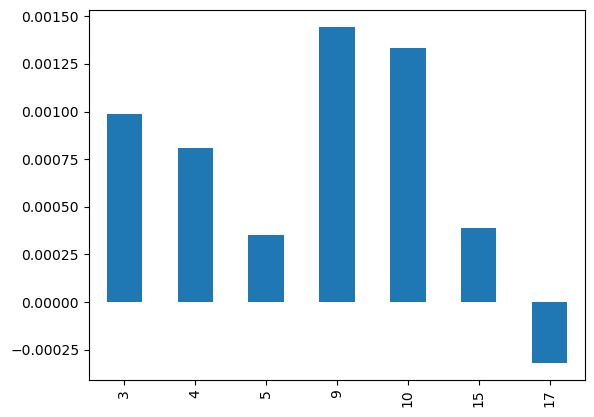

In [11]:
# Conservative Portfolio
low_risk_stocks["average_returns"].plot.bar()
conservative_portfolio = low_risk_stocks.nlargest(5, "average_returns")
conservative_portfolio

,ticker,beta,standard_deviation,sharpe_ratio,alpha,average_returns
12,ANET,1.047533,0.026520,0.056291,0.001452,0.002392
20,WFG,1.138758,0.035537,0.036335,0.001168,0.002190
0,AXON,1.101623,0.035555,0.032110,0.001052,0.002041
13,DELL,1.066018,0.025404,0.036576,0.000871,0.001828
26,AVGO,1.278804,0.026135,0.034049,0.000640,0.001789


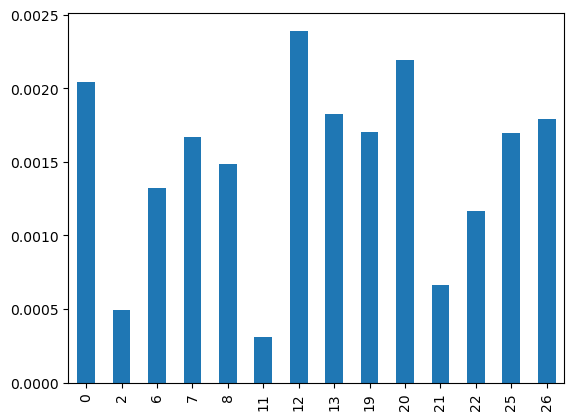

In [12]:
# Moderate Portfolio
medium_risk_stocks["average_returns"].plot.bar()
moderate_portfolio = medium_risk_stocks.nlargest(5, "average_returns")
moderate_portfolio

,ticker,beta,standard_deviation,sharpe_ratio,alpha,average_returns
24,NVDA,1.416150,0.032631,0.086121,0.002439,0.003711
18,SSP,1.613041,0.046559,0.014736,0.000136,0.001585
16,URE,2.035426,0.038777,0.013043,-0.000423,0.001404
23,RCL,1.773399,0.054913,-0.008670,-0.001171,0.000421
14,HP,1.760201,0.048015,-0.020243,-0.001656,-0.000075


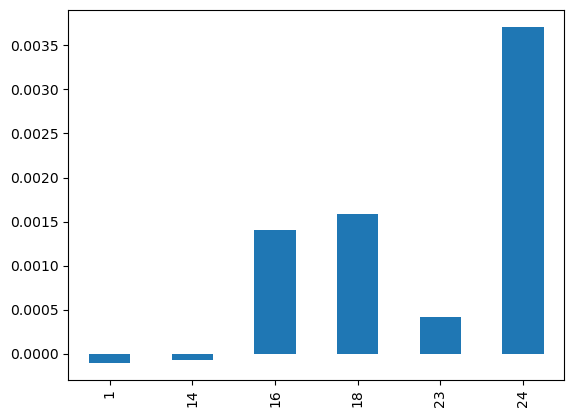

In [13]:
# Aggressive Portfolio
high_risk_stocks["average_returns"].plot.bar()
aggressive_portfolio = high_risk_stocks.nlargest(5, "average_returns")
aggressive_portfolio

In [ ]:
# monte carlo sim

In [14]:
# Create Ticker list
con_port_tickers_list = conservative_portfolio.ticker.values.tolist()
# Fetch the stock data for the tickers
con_port_data = yf.download(con_port_tickers_list, start="2019-04-01", end="2023-04-01")

# Display the DataFrame
con_port_df = con_port_data.drop(columns=['Adj Close','High', 'Low', 'Open', 'Volume'])
con_port_df.head(4)

[*********************100%***********************]  5 of 5 completed


Close                                             
                   FNV        IAU        NEM        NVO        REGN
Date                                                               
2021-04-01  129.910004  32.919998  61.810001  67.660004  474.929993
2021-04-05  130.740005  32.900002  62.490002  68.330002  484.559998
2021-04-06  131.960007  33.220001  62.799999  68.029999  478.679993
2021-04-07  131.419998  33.099998  62.009998  67.889999  481.790009

In [15]:
tickers = con_port_df.columns.get_level_values(1)
df1 = pd.DataFrame()
df1['close'] = con_port_df['Close'].iloc[:,0]

df2 = pd.DataFrame()
df2['close'] = con_port_df['Close'].iloc[:,1]

df3 = pd.DataFrame()
df3['close'] = con_port_df['Close'].iloc[:,2]

df4 = pd.DataFrame()
df4['close'] = con_port_df['Close'].iloc[:,3]

df5 = pd.DataFrame()
df5['close'] = con_port_df['Close'].iloc[:,4]

con_port_df = pd.concat([df1, df2, df3, df4, df5], axis = 1,  keys = tickers)
con_port_df.head(4)

,FNV,IAU,NEM,NVO,REGN
,close,close,close,close,close
Date,,,,,
2021-04-01,129.910004,32.919998,61.810001,67.660004,474.929993
2021-04-05,130.740005,32.900002,62.490002,68.330002,484.559998
2021-04-06,131.960007,33.220001,62.799999,68.029999,478.679993
2021-04-07,131.419998,33.099998,62.009998,67.889999,481.790009


In [16]:
mc_con_port = MCSimulation(
    portfolio_data = con_port_df,
    weights 
    num_simulation = 50,
    num_trading_days = 252*5
)
mc_con_port.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.013054,1.003216,1.005266,1.014839,0.998200,1.004470,0.998403,1.008864,0.989057,0.989934,...,1.000776,1.003018,0.992962,1.005526,1.014776,1.010434,0.994824,0.999862,0.998251,1.000005
2,1.015560,0.995522,1.002134,1.004629,0.995419,1.003228,1.002226,1.001980,0.979994,0.983254,...,1.001192,1.007351,0.970993,1.012611,1.013223,0.999106,0.991691,0.995481,0.984118,1.011197
3,0.997358,0.994179,1.004258,0.996056,0.996548,1.020097,1.018722,0.997698,0.976603,0.974645,...,1.015763,1.000309,0.975163,1.020321,1.017890,1.007455,0.991589,0.982673,0.988733,1.006762
4,0.996416,0.992853,1.001340,0.998300,0.990821,1.026704,1.004930,1.005119,0.974471,0.973099,...,1.011713,1.007427,0.990507,1.016507,1.028269,1.026687,0.985699,0.982946,1.001033,1.000343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.891313,1.615143,1.408539,1.397957,2.777258,1.839625,4.431441,2.478993,2.406013,2.386056,...,2.665270,1.645610,3.347330,2.853369,3.568054,2.410863,3.382014,1.860234,2.087506,1.749296
1257,2.855783,1.587145,1.423365,1.417323,2.776969,1.853153,4.480282,2.505611,2.413294,2.374040,...,2.605425,1.621896,3.343549,2.870652,3.555437,2.407258,3.380123,1.885056,2.069669,1.739525
1258,2.894002,1.604017,1.430786,1.401482,2.782542,1.867311,4.464324,2.527045,2.422846,2.381629,...,2.586130,1.633516,3.308416,2.855780,3.575592,2.421482,3.370971,1.877591,2.070485,1.757058
1259,2.872167,1.616150,1.456990,1.386193,2.805588,1.870904,4.483938,2.523067,2.427227,2.391074,...,2.606540,1.624028,3.311463,2.878916,3.549200,2.436956,3.383069,1.851067,2.083987,1.769769


<Axes: title={'center': '50 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

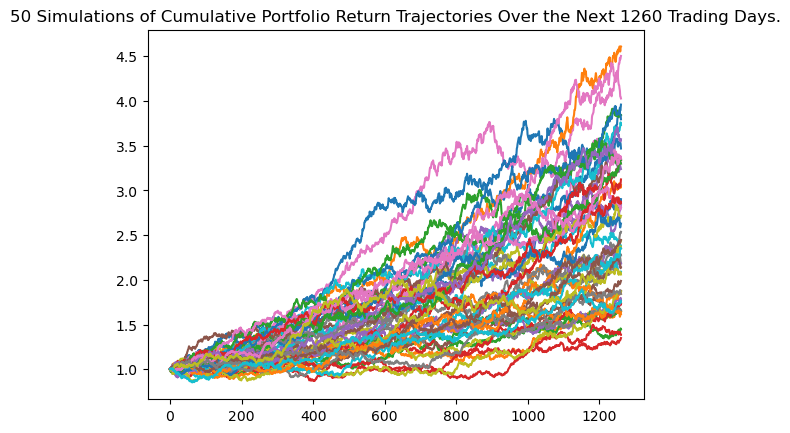

In [17]:
mc_con_port.plot_simulation()

In [18]:
# Define the tickers
med_port_tickers_list = moderate_portfolio.ticker.values.tolist()
med_port_tickers_list

# Fetch the stock data for the tickers
med_port_data = yf.download(med_port_tickers_list, start="2021-04-01", end="2023-04-01")

# Display the DataFrame
med_port_df = med_port_data.drop(columns=['Adj Close','High', 'Low', 'Open', 'Volume'])
med_port_df.head(3)

[*********************100%***********************]  5 of 5 completed


Close                                              
                 ANET        AVGO        AXON       DELL        WFG
Date                                                               
2021-04-01  77.010002  475.950012  143.059998  45.149517  73.940002
2021-04-05  77.904999  488.480011  146.330002  45.291435  76.110001
2021-04-06  76.967499  483.869995  145.600006  45.352257  75.540001

In [19]:
tickers = med_port_df.columns.get_level_values(1)
df1 = pd.DataFrame()
df1['close'] = med_port_df['Close'].iloc[:,0]

df2 = pd.DataFrame()
df2['close'] = med_port_df['Close'].iloc[:,1]

df3 = pd.DataFrame()
df3['close'] = med_port_df['Close'].iloc[:,2]

df4 = pd.DataFrame()
df4['close'] = med_port_df['Close'].iloc[:,3]

df5 = pd.DataFrame()
df5['close'] = med_port_df['Close'].iloc[:,4]

med_port_df = pd.concat([df1, df2, df3, df4, df5], axis = 1,  keys = tickers)
med_port_df

,ANET,AVGO,AXON,DELL,WFG
,close,close,close,close,close
Date,,,,,
2021-04-01,77.010002,475.950012,143.059998,45.149517,73.940002
2021-04-05,77.904999,488.480011,146.330002,45.291435,76.110001
2021-04-06,76.967499,483.869995,145.600006,45.352257,75.540001
2021-04-07,76.955002,482.459991,147.270004,46.381145,79.449997
2021-04-08,77.812500,485.480011,150.570007,46.923466,81.959999
...,...,...,...,...,...
2023-03-27,167.960007,626.840027,218.589996,37.990002,71.389999
2023-03-28,163.000000,624.700012,215.600006,38.310001,70.300003


In [20]:
mc_med_port = MCSimulation(
    portfolio_data = con_port_df,
    weights = [1/5, 1/5, 1/5, 1/5, 1/5],
    num_simulation = 50,
    num_trading_days = 252*5
)
mc_med_port.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993366,1.009568,0.994628,1.016505,1.018735,1.010900,1.009320,1.004806,1.006791,0.992545,...,1.005834,0.992401,1.002936,0.991554,1.010611,1.004543,1.005162,0.992600,1.005332,0.991652
2,0.990644,1.018677,0.993838,1.016827,1.028100,1.025053,1.034265,0.997759,1.016451,0.985573,...,1.001680,0.988375,0.997883,0.985141,0.998147,1.004342,1.003813,1.000447,1.023061,0.981469
3,0.987205,1.023091,0.982861,1.009021,1.018941,1.041757,1.029086,1.001545,1.013716,0.987092,...,1.004576,1.000036,1.000096,0.980279,1.002077,0.986710,0.985915,0.995486,1.030163,0.981454
4,0.994304,1.023692,0.983903,0.992005,1.014406,1.041419,1.042727,0.994313,1.011788,0.981557,...,0.999412,1.023562,0.998186,0.977476,0.986765,0.998883,0.982003,1.009640,1.032417,0.984393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.079645,2.580855,3.266038,3.206998,2.539216,3.181369,3.272779,2.365038,3.083979,2.473634,...,3.068901,1.264082,2.653454,1.955703,1.474702,2.343921,3.289881,1.911272,3.303297,1.682134
1257,3.060164,2.594810,3.302850,3.237245,2.577565,3.203830,3.241635,2.371340,3.076657,2.455409,...,3.031381,1.262523,2.650932,1.974756,1.478187,2.350217,3.297468,1.936154,3.297086,1.697777
1258,3.054544,2.589884,3.303118,3.222345,2.607728,3.215791,3.219539,2.367900,3.089861,2.473179,...,3.043113,1.273579,2.669988,1.974612,1.480754,2.337454,3.297663,1.928100,3.325786,1.681182
1259,3.075659,2.567666,3.312359,3.203411,2.589945,3.231360,3.206674,2.385038,3.117435,2.455280,...,3.030228,1.250706,2.645318,1.981687,1.492482,2.318910,3.274970,1.923140,3.321539,1.667589


<Axes: title={'center': '50 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

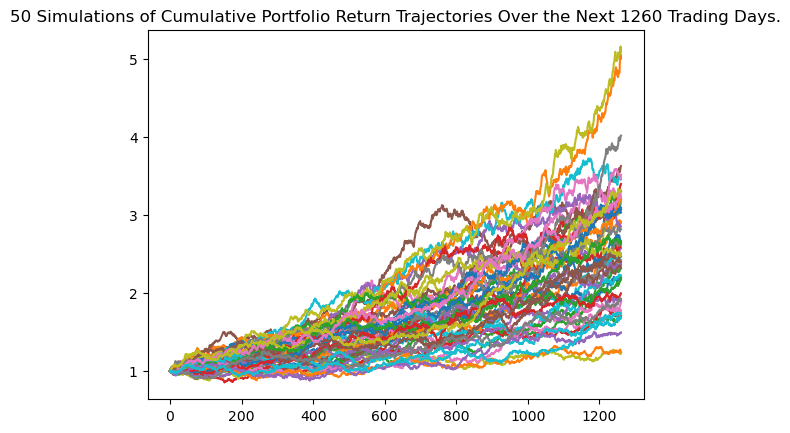

In [21]:
mc_med_port.plot_simulation()

In [24]:
# Define the tickers
agg_port_tickers_list = aggressive_portfolio.ticker.values.tolist()
agg_port_tickers_list

# Fetch the stock data for the tickers
agg_port_data = yf.download(agg_port_tickers_list, start="2021-04-01", end="2023-04-01")

# Display the DataFrame
agg_port_df = agg_port_data.drop(columns=['Adj Close','High', 'Low', 'Open', 'Volume'])
agg_port_df.head(3)

[*********************100%***********************]  5 of 5 completed


Close                                         
                   HP        NVDA        RCL    SSP        URE
Date                                                          
2021-04-01  28.440001  138.117493  86.669998  19.74  73.989998
2021-04-05  26.850000  139.875000  89.150002  19.75  74.660004
2021-04-06  26.889999  138.615005  90.760002  20.09  74.980003

In [25]:
tickers = agg_port_df.columns.get_level_values(1)
df1 = pd.DataFrame()
df1['close'] = agg_port_df['Close'].iloc[:,0]

df2 = pd.DataFrame()
df2['close'] = agg_port_df['Close'].iloc[:,1]

df3 = pd.DataFrame()
df3['close'] = agg_port_df['Close'].iloc[:,2]

df4 = pd.DataFrame()
df4['close'] = agg_port_df['Close'].iloc[:,3]

df5 = pd.DataFrame()
df5['close'] = agg_port_df['Close'].iloc[:,4]

agg_port_df = pd.concat([df1, df2, df3, df4, df5], axis = 1,  keys = tickers)
agg_port_df

,HP,NVDA,RCL,SSP,URE
,close,close,close,close,close
Date,,,,,
2021-04-01,28.440001,138.117493,86.669998,19.740000,73.989998
2021-04-05,26.850000,139.875000,89.150002,19.750000,74.660004
2021-04-06,26.889999,138.615005,90.760002,20.090000,74.980003
2021-04-07,27.530001,141.434998,91.040001,20.160000,75.110001
2021-04-08,26.900000,143.169998,89.790001,20.379999,74.629997
...,...,...,...,...,...
2023-03-27,35.320000,265.309998,60.490002,9.160000,51.730000
2023-03-28,36.740002,264.100006,61.869999,8.960000,51.410000


In [26]:
mc_agg_port = MCSimulation(
    portfolio_data = agg_port_df,
    weights = [1/5, 1/5, 1/5, 1/5, 1/5],
    num_simulation = 50,
    num_trading_days = 252*5
)

In [27]:
mc_agg_port.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.016661,0.989683,1.008725,1.001097,0.980126,0.999667,1.019514,1.012177,1.007206,1.014792,...,1.008345,0.986191,0.996970,0.990420,0.984405,1.005275,0.987599,1.012636,1.014255,0.978692
2,1.002188,0.997030,0.997856,0.999286,0.963831,0.999074,1.049607,1.035490,1.007891,1.003314,...,0.992466,1.003222,0.996780,0.968948,0.966568,1.001923,0.998279,0.983653,1.027753,0.992373
3,0.967632,0.984773,0.977949,1.001334,0.976915,0.958582,1.067859,1.030696,1.005730,1.018147,...,1.004775,1.006831,0.987785,0.950617,0.975650,1.003902,1.006249,0.981143,1.051419,1.002744
4,0.974286,0.970164,0.978726,0.991429,0.962597,0.956290,1.087212,1.013618,1.006081,1.012984,...,1.003249,1.003536,0.980069,0.938798,0.982485,0.989355,1.009008,0.991977,1.049734,1.010648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.519082,2.247372,0.649296,0.881405,1.254437,1.912788,1.932719,1.597430,2.006671,3.658308,...,0.843468,1.612492,1.070471,1.168117,0.901000,1.490577,0.481996,1.421907,0.805047,2.447987
1257,1.557850,2.287447,0.645184,0.903705,1.270348,1.882379,1.934800,1.594413,2.041322,3.747984,...,0.859826,1.632034,1.069824,1.145492,0.936083,1.498632,0.473526,1.426674,0.784741,2.403931
1258,1.541696,2.283904,0.642465,0.918173,1.285989,1.880301,1.894396,1.602577,2.049660,3.720591,...,0.869041,1.671706,1.060326,1.149228,0.927983,1.484070,0.477941,1.445004,0.795605,2.416209
1259,1.525375,2.321884,0.645887,0.928198,1.277163,1.902411,1.907788,1.611398,2.028916,3.750900,...,0.861603,1.655968,1.057374,1.147676,0.926150,1.480453,0.464667,1.444287,0.778437,2.431992


<Axes: title={'center': '50 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

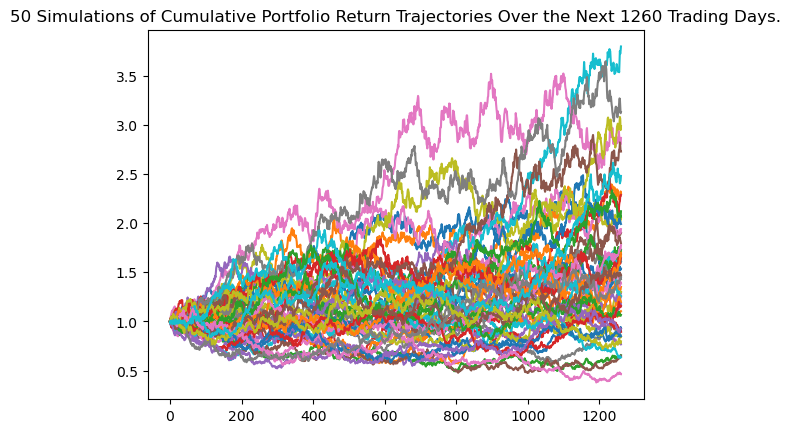

In [28]:
mc_agg_port.plot_simulation()